In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.drop(['Serial No.'], axis=1, inplace=True)

In [4]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.8, random_state=0)

In [14]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras import Sequential

In [19]:
model = Sequential()
model.add(Dense(7, activation='relu', input_shape=(7,)))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='linear'))

C:\Users\dhani\new_anaconda 3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.compile(optimizer='Adam', loss='mean_squared_error', metrics=['r2_score'])

In [29]:
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0160 - r2_score: 0.3401
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0149 - r2_score: 0.3858
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0138 - r2_score: 0.4310
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0129 - r2_score: 0.4687
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0121 - r2_score: 0.5013
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0114 - r2_score: 0.5312
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0108 - r2_score: 0.5559
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0101 - r2_score: 0.5822
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0097 - r2_score: 0.5991
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0093 - r2_score: 0.6169
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0089 - r2_score: 0.6336
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0086 - r2_sco

In [30]:
model.evaluate(X_test, y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0066 - r2_score: 0.6567 


[0.006615302059799433, 0.6566900014877319]

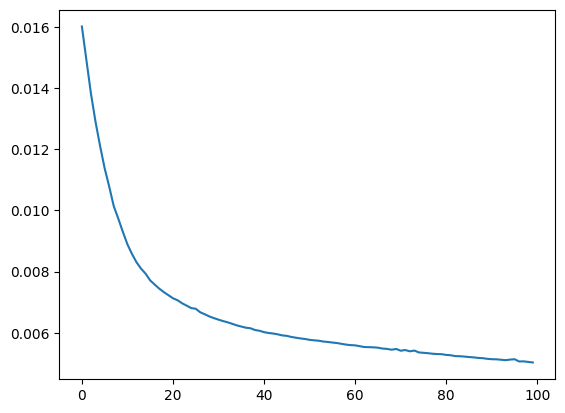

In [33]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

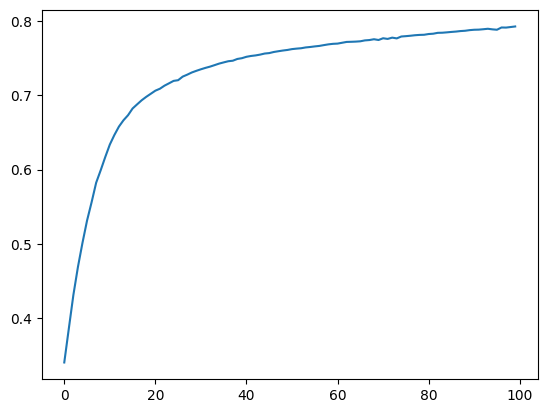

In [34]:
plt.plot(history.history['r2_score'])